In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Specify the path to the Excel file
excel_file = r'C:\Users\jaina\OneDrive\Desktop\1st PROJECT(EDA)\edarm\courera\Copy of NCRN LAND Bird Monitoring Data 2007 - 2017_Public(1).xlsx'

# List the sheet names you want to combine
sheet_names = ['ANTI', 'CATO', 'CHOH','GWMP','HAFE','MANA','MONO','NACE','PRWI','ROCR','WOTR']

# Read each sheet into a DataFrame and concatenate them
df_list = []
for sheet in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet)
    df['SheetName'] = sheet  # Add a column to identify the sheet name
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

       Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0                 ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
1                 ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
2                 ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
3                 ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
4                 ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
...                ...           ...       ...        ...           ...   ...   
126568            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126569            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126570            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126571            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126572            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   

             Date Start_Tim

In [3]:
combined_df=combined_df.copy()

In [4]:
combined_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,SheetName
0,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,ACFL,False,True,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI
1,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,BGGN,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI
2,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,ACFL,False,True,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI
3,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,AMGO,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI
4,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,AMCR,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI


In [5]:
combined_df.shape

(126573, 30)

In [6]:
combined_df.sample(3)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,SheetName
12361,ANTI,NaN,NaN,ANTI-0145,Grassland,2017,2017-05-29,05:38:00,05:48:00,Ryan Trenkamp,...,CEDW,False,False,19.700001,75.300003,Cloudy/Overcast,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,ANTI
57941,HAFE,NaN,HAFE 2,HAFE-0083,Forest,2013,2013-05-19,07:53:00,08:03:00,Molly Albecker,...,COGR,False,False,18.000000,75.000000,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,HAFE
42850,CHOH,NaN,CHOH 15,CHOH-1201,Forest,2011,2011-06-30,07:17:00,07:27:00,James Petersen,...,ETTI,False,False,14.000000,74.000000,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,True,CHOH


In [7]:
# Dropping irrelevant columns
columns_to_drop = ['Plot_Name', 'Observer',
                   'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'SheetName']
combined_df = combined_df.drop(columns=columns_to_drop)

In [8]:
combined_df.shape

(126573, 24)

**MISSING VALUE IMMPUTATION**

In [9]:
combined_df.duplicated().sum()

6119

In [10]:
df_cleaned = combined_df.drop_duplicates()

In [11]:
df_cleaned.isnull().sum()

Admin_Unit_Code                     0
Sub_Unit_Code                  112306
Site_Name                       22267
Location_Type                      16
Year                                0
Date                                0
Start_Time                         13
End_Time                           13
Visit                               0
Interval_Length                     3
ID_Method                        4079
Distance                         4408
Flyover_Observed                    0
Sex                              5313
Common_Name                         3
Scientific_Name                     3
PIF_Watchlist_Status                0
Regional_Stewardship_Status         0
Temperature                        10
Humidity                           99
Sky                                10
Wind                               10
Disturbance                        10
Initial_Three_Min_Cnt               0
dtype: int64

In [12]:
df=df_cleaned.drop(columns=['Sub_Unit_Code'])

In [13]:
df.dtypes

Admin_Unit_Code                        object
Site_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
PIF_Watchlist_Status                     bool
Regional_Stewardship_Status              bool
Temperature                           float64
Humidity                              float64
Sky                                    object
Wind                                   object
Disturbance                       

In [14]:
# Function to fill missing values with the mode of the group
def fill_with_mode(Admin_Unit_Code):
    mode_value = Admin_Unit_Code.mode().iloc[0] 
    return Admin_Unit_Code.fillna(mode_value)

In [15]:
df['Location_Type'] = df['Location_Type'].fillna(method='ffill')

C:\Users\jaina\AppData\Local\Temp\ipykernel_12048\828392491.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Location_Type'] = df['Location_Type'].fillna(method='ffill')


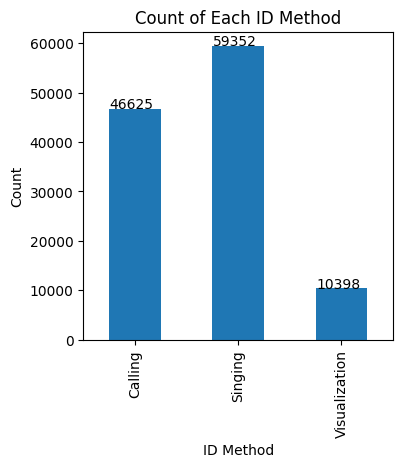

In [16]:
#fig = plt.figure(figsize=(4, 4))
#(df.groupby('ID_Method')).size().plot(kind='bar', annote=True)

fig = plt.figure(figsize=(4, 4))
ax = (df.groupby('ID_Method').size()).plot(kind='bar')
plt.xlabel('ID Method')
plt.ylabel('Count')
plt.title('Count of Each ID Method')

# Add annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [17]:
df['ID_Method'] = df['ID_Method'].fillna(method='ffill') #unsupervised 

C:\Users\jaina\AppData\Local\Temp\ipykernel_12048\2526331061.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ID_Method'] = df['ID_Method'].fillna(method='ffill') #unsupervised


In [18]:
df[['Sex','Distance']] = df[['Sex','Distance']].fillna(method='ffill')

C:\Users\jaina\AppData\Local\Temp\ipykernel_12048\4065089649.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Sex','Distance']] = df[['Sex','Distance']].fillna(method='ffill')


In [19]:
df.isnull().sum()

Admin_Unit_Code                    0
Site_Name                      22267
Location_Type                      0
Year                               0
Date                               0
Start_Time                        13
End_Time                          13
Visit                              0
Interval_Length                    3
ID_Method                          0
Distance                           0
Flyover_Observed                   0
Sex                                0
Common_Name                        3
Scientific_Name                    3
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                       10
Humidity                          99
Sky                               10
Wind                              10
Disturbance                       10
Initial_Three_Min_Cnt              0
dtype: int64

The issue encountered while imputing the missing values in the AcceptedTSN column is that there are two birds, whose scientific names are represented as "#unidentified" and "#Aves," which have no record in either the AcceptedTSN column or the common_name column. This means that the TSN number for these birds can only be imputed by assigning the value 0 to the AcceptedTSN column. -- this was checked in excel

In [20]:
df[['Common_Name','Scientific_Name']] = df[['Common_Name','Scientific_Name']].fillna('unknown')
df.isnull().sum()

Admin_Unit_Code                    0
Site_Name                      22267
Location_Type                      0
Year                               0
Date                               0
Start_Time                        13
End_Time                          13
Visit                              0
Interval_Length                    3
ID_Method                          0
Distance                           0
Flyover_Observed                   0
Sex                                0
Common_Name                        0
Scientific_Name                    0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                       10
Humidity                          99
Sky                               10
Wind                              10
Disturbance                       10
Initial_Three_Min_Cnt              0
dtype: int64

In [21]:
df = df[df['Scientific_Name'] != 'Aves']
#as aves has neither TSN,Nor Taxon code

In [22]:
df.shape

(120374, 23)

In [23]:
def forward_fill(series):
    return series.ffill()

# List of columns to fill missing values
columns_to_fill = ['Disturbance', 'Temperature', 'Humidity', 'Sky', 'Wind']

for column in columns_to_fill:
    df[column] = df.groupby('Date')[column].transform(forward_fill)

In [24]:
mode_value = df['Interval_Length'].mode()[0]
df['Interval_Length']=df['Interval_Length'].fillna(mode_value)

In [25]:
def forward_fill(series):
    return series.ffill()

columns_to_fill = ['Start_Time', 'End_Time']

for column in columns_to_fill:
    df[column] = df.groupby('Date')[column].transform(forward_fill)

In [26]:
df.isnull().sum()

Admin_Unit_Code                    0
Site_Name                      22232
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Visit                              0
Interval_Length                    0
ID_Method                          0
Distance                           0
Flyover_Observed                   0
Sex                                0
Common_Name                        0
Scientific_Name                    0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
Disturbance                        0
Initial_Three_Min_Cnt              0
dtype: int64

In [27]:
df.duplicated().sum()

13

In [28]:
df = df.drop_duplicates()

In [29]:
df.duplicated().sum()

0

**DATA ANALYSIS**

In [30]:
#finding the total counts of each bird
bird_counts = df['Common_Name'].value_counts()
bird_counts 

Common_Name
Red-eyed Vireo             8121
Northern Cardinal          6385
Eastern Tufted Titmouse    6322
Eastern Wood-Pewee         5412
Carolina Wren              5115
                           ... 
Marsh Wren                    1
Ruby-crowned Kinglet          1
American Bittern              1
Snowy Egret                   1
Red-breasted Nuthatch         1
Name: count, Length: 182, dtype: int64

There are a total number of 182 birds in NCRN 

In [31]:
df['bird_counts'] = df.groupby('Common_Name')['Common_Name'].transform('count')

In [32]:
df.sample(5)

,Admin_Unit_Code,Site_Name,Location_Type,Year,Date,Start_Time,End_Time,Visit,Interval_Length,ID_Method,...,Scientific_Name,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts
91444,NACE,NACE 2,Forest,2017,2017-06-13,06:34:00,06:44:00,2,2.5 - 5 min,Calling,...,Empidonax virescens,False,True,23.000000,82.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,No effect on count,True,4886
89430,NACE,NACE 2,Forest,2013,2013-05-24,06:47:00,06:57:00,1,2.5 - 5 min,Singing,...,Pipilo erythrophthalmus,False,True,21.000000,70.0,Cloudy/Overcast,Light air movement (1-3 mph) smoke drifts,Moderate effect on count,True,1585
17628,CATO,CATO 7,Forest,2014,2014-06-20,05:16:00,05:26:00,2,2.5 - 5 min,Singing,...,Spizella passerina,False,False,12.400000,79.0,Partly Cloudy,Light breeze (4-7 mph) wind felt on face,No effect on count,False,1378
89581,NACE,NACE 1,Forest,2008,2008-06-20,07:05:00,07:20:00,2,2.5 - 5 min,Calling,...,Empidonax virescens,False,True,16.799999,92.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,No effect on count,True,4886
24534,CHOH,CHOH 15,Forest,2010,2010-05-26,06:41:00,06:52:00,1,7.5 - 10 min,Calling,...,Corvus brachyrhynchos,False,False,17.100000,81.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,3271


In [33]:
df1=df.copy()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120361 entries, 0 to 126572
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Admin_Unit_Code              120361 non-null  object        
 1   Site_Name                    98132 non-null   object        
 2   Location_Type                120361 non-null  object        
 3   Year                         120361 non-null  int64         
 4   Date                         120361 non-null  datetime64[ns]
 5   Start_Time                   120361 non-null  object        
 6   End_Time                     120361 non-null  object        
 7   Visit                        120361 non-null  int64         
 8   Interval_Length              120361 non-null  object        
 9   ID_Method                    120361 non-null  object        
 10  Distance                     120361 non-null  object        
 11  Flyover_Observed             12

In [35]:
# Sample classification criteria based on total count
def classify_bird(count):
    if count <= 5:
        return 'Endangered'
    elif count <= 50:
        return 'Threatened'
    elif count <= 500:
        return 'Rare'
    elif count <= 5000:
        return 'Common'
    else:
        return 'Very Common'

# Apply the classification function to create a new column 'bird_classification'
df1['bird_classification'] = df1['bird_counts'].apply(classify_bird)

C:\Users\jaina\AppData\Local\Temp\ipykernel_12048\963848946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=classification_counts.index, y=classification_counts.values, palette="viridis")


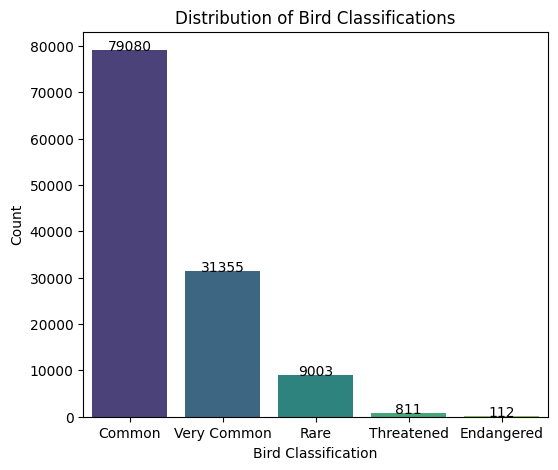

In [36]:
#distribution of bird classification
classification_counts = df1['bird_classification'].value_counts()
plt.figure(figsize=(6, 5))
barplot=sns.barplot(x=classification_counts.index, y=classification_counts.values, palette="viridis")


for index, value in enumerate(classification_counts.values):
    barplot.text(index, value + 0.5, str(value), ha='center')  
plt.xlabel('Bird Classification')
plt.ylabel('Count')
plt.title('Distribution of Bird Classifications')
plt.show()

In [37]:
df1.sample(5)

,Admin_Unit_Code,Site_Name,Location_Type,Year,Date,Start_Time,End_Time,Visit,Interval_Length,ID_Method,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification
69159,MANA,NaN,Grassland,2017,2017-07-12,09:22:00,09:32:00,3,7.5 - 10 min,Singing,...,False,True,33.0,54.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,3437,Common
122777,ROCR,ROCR 2,Forest,2012,2012-06-25,06:04:00,06:13:00,2,0-2.5 min,Calling,...,False,False,21.1,81.000000,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,True,3479,Common
1151,ANTI,ANTI 1,Forest,2013,2013-06-28,06:05:00,06:15:00,2,0-2.5 min,Calling,...,False,False,25.0,71.000000,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,True,3271,Common
112180,PRWI,PRWI 19,Forest,2014,2014-05-31,06:58:00,07:08:00,1,0-2.5 min,Singing,...,False,False,15.6,93.199997,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,True,8121,Very Common
71055,MANA,NaN,Grassland,2015,2015-06-24,08:03:00,08:13:00,2,7.5 - 10 min,Calling,...,False,False,28.5,61.599998,Clear or Few Clouds,"Gentle breeze (8-12 mph), leaves in motion",No effect on count,False,1757,Common


In [38]:
df1.shape

(120361, 25)

In [39]:
# Filtering birds with count less than 5
birds_on_verge_of_extinction = bird_counts[bird_counts < 5]

In [40]:
birds_on_verge_of_extinction

Common_Name
Great Egret                    4
Golden-crowned Kinglet         4
Olive-sided Flycatcher         4
Black-crowned Night-Heron      4
Eastern Screech-Owl            3
Herring Gull                   3
Canada Warbler                 3
Winter Wren                    3
Common Nighthawk               3
unknown                        3
Swamp Sparrow                  3
Nashville Warbler              3
Ring-billed Gull               2
Yellow-bellied Flycatcher      2
Rusty Blackbird                2
Dickcissel                     2
Cape May Warbler               2
Peregrine Falcon               2
Unidentified Owl               2
Ring-necked Pheasant           2
Spotted Sandpiper              2
Bay-breasted Warbler           2
Common Merganser               2
Palm Warbler                   2
Hooded Merganser               1
Northern Saw-whet Owl          1
Laughing Gull                  1
Northern Harrier               1
Unidentified Accipiter Hawk    1
Blackburnian Warbler           

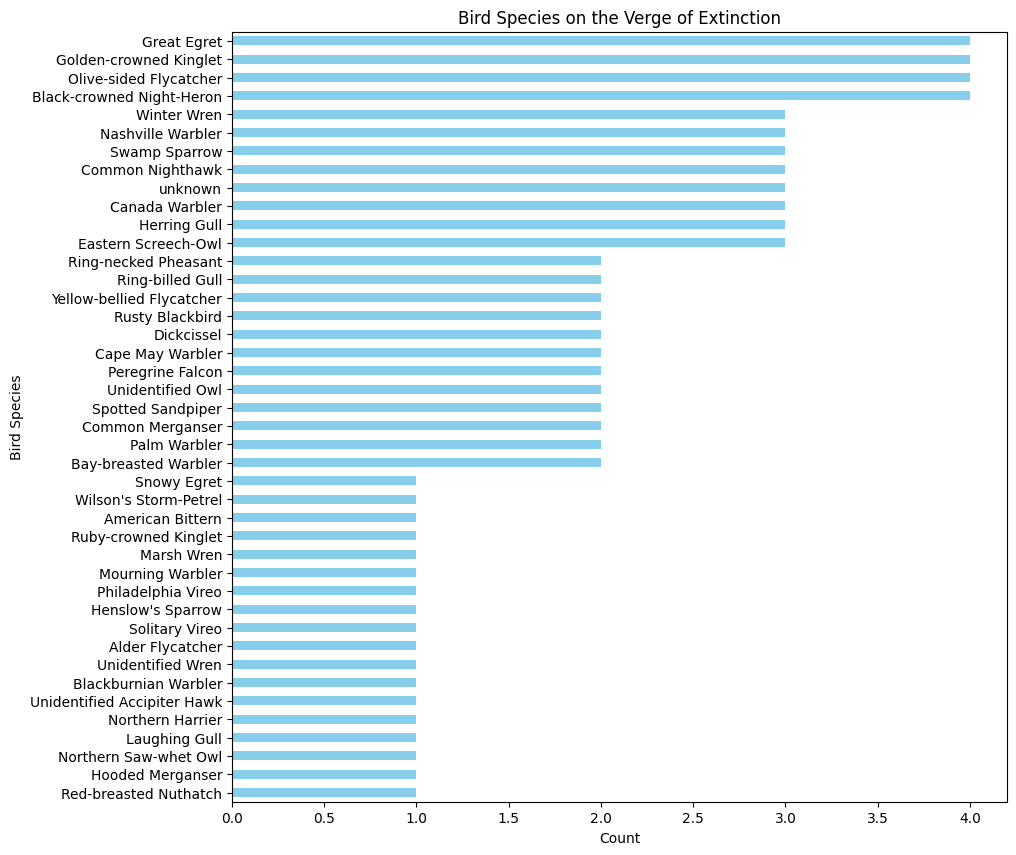

In [41]:
# Plotting a horizontal bar chart
plt.figure(figsize=(10, 10))
birds_on_verge_of_extinction.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bird Species')
plt.title('Bird Species on the Verge of Extinction')
plt.show()

In [42]:
extinction_details = df1[df1['Common_Name'].isin(birds_on_verge_of_extinction.index)]
extinction_details.shape

(82, 25)

In [43]:
#Extinction Events by Location and Admin Unit Code
extinction_location_counts = extinction_details.groupby(['Admin_Unit_Code', 'Location_Type']).size().reset_index(name='count')
extinction_location_counts

,Admin_Unit_Code,Location_Type,count
0,ANTI,Forest,1
1,ANTI,Grassland,7
2,CATO,Forest,2
3,CHOH,Forest,30
4,GWMP,Forest,8
5,HAFE,Forest,5
6,MANA,Forest,9
7,MANA,Grassland,2
8,MONO,Forest,2
9,MONO,Grassland,1


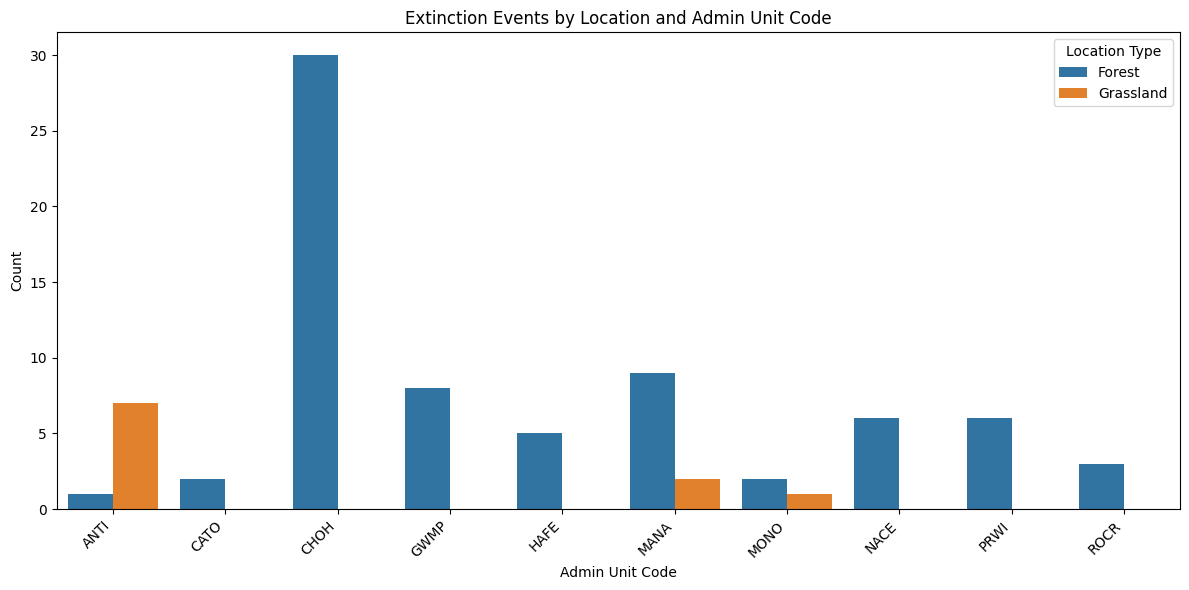

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Admin_Unit_Code', y='count', hue='Location_Type', data=extinction_location_counts)

plt.xlabel('Admin Unit Code')
plt.ylabel('Count')
plt.title('Extinction Events by Location and Admin Unit Code')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Location Type')
plt.tight_layout()
plt.show()


In [45]:
# Summing up the counts for each location
park_summary = extinction_location_counts.groupby('Admin_Unit_Code')['count'].sum().reset_index()
park_summary

,Admin_Unit_Code,count
0,ANTI,8
1,CATO,2
2,CHOH,30
3,GWMP,8
4,HAFE,5
5,MANA,11
6,MONO,3
7,NACE,6
8,PRWI,6
9,ROCR,3


example of plotting habitat preferences using a stacked bar chart to show the proportion of bird sightings in different habitat types:

In [46]:
location_summary = extinction_location_counts.groupby('Location_Type')['count'].sum().reset_index()
location_summary

,Location_Type,count
0,Forest,72
1,Grassland,10


The analysis indicates that a significant number of birds on the verge of extinction are located in the Chesapeake and Ohio Canal National Historical Park (CHOH), while there are no such birds in the Wolf Trap National Park for the Performing Arts (WOTR). Additionally, the data shows that more birds at risk of extinction are found in forest habitats (72 individuals) compared to those in grasslands (10 individuals).

In [47]:
#Calculate summary statistics for temperature, humidity and wind speed
'''temperature_summary = extinction_details['Temperature'].describe()
humidity_summary = extinction_details['Humidity'].describe()
wind_speed_summary = extinction_details['Wind'].describe()
print('temperature_summary is:',temperature_summary)
print('humidity_summary is:', humidity_summary)
print('wind_speed_summary is:',wind_speed_summary)'''

"temperature_summary = extinction_details['Temperature'].describe()\nhumidity_summary = extinction_details['Humidity'].describe()\nwind_speed_summary = extinction_details['Wind'].describe()\nprint('temperature_summary is:',temperature_summary)\nprint('humidity_summary is:', humidity_summary)\nprint('wind_speed_summary is:',wind_speed_summary)"

In [48]:
def analyze_park(park_name):
    # here i am filtering the extinction_details for the specified park
    park_details = extinction_details[extinction_details['Admin_Unit_Code'] == park_name]
    
    # Check if the park has data
    if park_details.empty:
        print(f"No data available for the park: {park_name}")
        return
    
    # Calculate summary statistics for the specified park
    temperature_summary = park_details['Temperature'].describe()
    humidity_summary = park_details['Humidity'].describe()
    wind_speed_summary = park_details['Wind'].describe()
    
    # Print summaries
    print(f"\nAnalysis for {park_name} park:")
    print(f"\nTemperature Summary ({park_name}):")
    print(temperature_summary)
    print('****************************************')
    
    print(f"\nHumidity Summary ({park_name}):")
    print(humidity_summary)
    print('****************************************')
    
    print(f"\nWind Speed Summary ({park_name}):")
    print(wind_speed_summary)

In [49]:
analyze_park('CHOH')


Analysis for CHOH park:

Temperature Summary (CHOH):
count    30.000000
mean     19.616667
std       4.197297
min      11.000000
25%      18.125000
50%      20.050000
75%      21.375000
max      27.299999
Name: Temperature, dtype: float64
****************************************

Humidity Summary (CHOH):
count    30.000000
mean     77.546667
std       8.817018
min      52.000000
25%      74.000000
50%      77.700001
75%      83.750000
max      90.699997
Name: Humidity, dtype: float64
****************************************

Wind Speed Summary (CHOH):
count                                        30
unique                                        4
top       Calm (< 1 mph) smoke rises vertically
freq                                         22
Name: Wind, dtype: object


In [50]:
analyze_park('ANTI')


Analysis for ANTI park:

Temperature Summary (ANTI):
count     8.000000
mean     20.537500
std       3.707883
min      16.500000
25%      17.275000
50%      20.000000
75%      23.400001
max      26.500000
Name: Temperature, dtype: float64
****************************************

Humidity Summary (ANTI):
count     8.000000
mean     74.487500
std       7.138714
min      62.700001
25%      71.750000
50%      74.250000
75%      78.125000
max      85.199997
Name: Humidity, dtype: float64
****************************************

Wind Speed Summary (ANTI):
count                                             8
unique                                            2
top       Light air movement (1-3 mph) smoke drifts
freq                                              7
Name: Wind, dtype: object


In [51]:
analyze_park('WOTR')

No data available for the park: WOTR


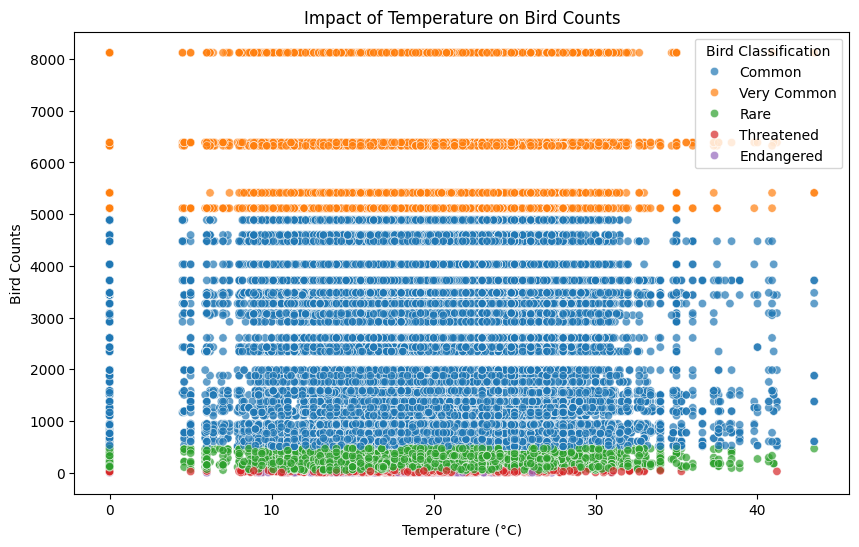

In [52]:
# Scatter plot of bird counts vs. temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Temperature', y='bird_counts', hue='bird_classification', alpha=0.7)
plt.title('Impact of Temperature on Bird Counts')
plt.xlabel('Temperature (°C)')
plt.ylabel('Bird Counts')
plt.legend(title='Bird Classification')
plt.show()

In [53]:
df1['day'] = df1['Date'].dt.day
df1['month'] = df1['Date'].dt.month

# Drop the original date column
df1.drop('Date', axis=1, inplace=True)

In [54]:
df1 = df1.sort_values(by='Year')
df1['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [55]:
year_index = df1.columns.get_loc('Year')
year_index

3

In [56]:
df1.head(1)

,Admin_Unit_Code,Site_Name,Location_Type,Year,Start_Time,End_Time,Visit,Interval_Length,ID_Method,Distance,...,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification,day,month
26862,CHOH,CHOH 1,Forest,2007,05:49:00,05:59:00,2,2.5 - 5 min,Calling,<= 50 Meters,...,10.5,76.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,1258,Common,2,7


In [57]:
df1.insert(year_index+1,'day', df1.pop('day'))
df1.insert(year_index+2, 'month', df1.pop('month'))

In [58]:
df1.head(1)

,Admin_Unit_Code,Site_Name,Location_Type,Year,day,month,Start_Time,End_Time,Visit,Interval_Length,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification
26862,CHOH,CHOH 1,Forest,2007,2,7,05:49:00,05:59:00,2,2.5 - 5 min,...,False,False,10.5,76.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,1258,Common


In [59]:
df1['day'].dtype

dtype('int32')

In [60]:
df1

,Admin_Unit_Code,Site_Name,Location_Type,Year,day,month,Start_Time,End_Time,Visit,Interval_Length,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification
26862,CHOH,CHOH 1,Forest,2007,2,7,05:49:00,05:59:00,2,2.5 - 5 min,...,False,False,10.5,76.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,1258,Common
94437,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,5 - 7.5 min,...,False,False,14.7,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,8121,Very Common
94436,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,False,False,14.7,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,3072,Common
94435,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,False,False,14.7,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,646,Common
94434,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,False,False,14.7,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,1878,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,ANTI,NaN,Grassland,2017,26,6,09:10:00,09:20:00,2,2.5 - 5 min,...,False,False,29.0,45.0,Clear or Few Clouds,"Gentle breeze (8-12 mph), leaves in motion",Slight effect on count,False,606,Common
10687,ANTI,NaN,Grassland,2017,26,6,09:10:00,09:20:00,2,5 - 7.5 min,...,False,False,29.0,45.0,Clear or Few Clouds,"Gentle breeze (8-12 mph), leaves in motion",Slight effect on count,False,1378,Common
10692,ANTI,NaN,Grassland,2017,26,6,09:10:00,09:20:00,2,0-2.5 min,...,False,False,29.0,45.0,Clear or Few Clouds,"Gentle breeze (8-12 mph), leaves in motion",Slight effect on count,True,513,Common
10695,ANTI,NaN,Grassland,2017,26,6,09:10:00,09:20:00,2,5 - 7.5 min,...,False,False,29.0,45.0,Clear or Few Clouds,"Gentle breeze (8-12 mph), leaves in motion",Slight effect on count,False,130,Rare


In [61]:
# Group by month and common_name, and count occurrences
monthly_bird_counts = df1.groupby(['month', 'Common_Name']).size().reset_index(name='count')
monthly_bird_counts

,month,Common_Name,count
0,5,Acadian Flycatcher,727
1,5,Alder Flycatcher,1
2,5,American Crow,869
3,5,American Goldfinch,978
4,5,American Kestrel,5
...,...,...,...
453,7,Yellow-billed Cuckoo,610
454,7,Yellow-breasted Chat,21
455,7,Yellow-throated Vireo,174
456,7,Yellow-throated Warbler,27


In [62]:
# Find the most frequently seen bird for each month
most_frequent_birds = monthly_bird_counts.loc[monthly_bird_counts.groupby('month')['count'].idxmax()]
most_frequent_birds

,month,Common_Name,count
92,5,Northern Cardinal,1960
271,6,Red-eyed Vireo,3843
414,7,Red-eyed Vireo,2651


In month 5, the most frequently seen bird is Northern Cardinal with 1985 sightings.

In month 6, the most frequently seen bird is Red-eyed Vireo with 3844 sightings.

In month 7, the most frequently seen bird is Red-eyed Vireo with 2652 sightings.

C:\Users\jaina\AppData\Local\Temp\ipykernel_12048\2894519051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_counts, x='month', y='bird_counts', palette='viridis')


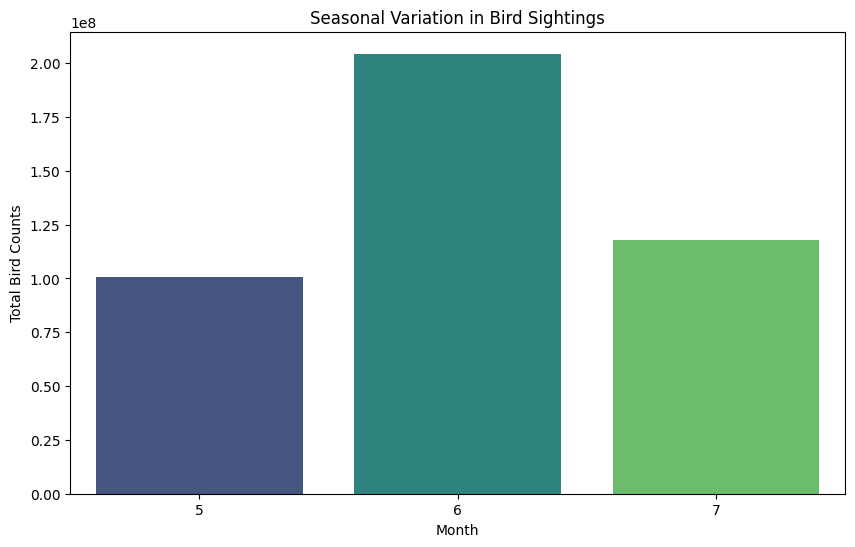

In [63]:
# Aggregate bird counts by month
monthly_counts = df1.groupby('month')['bird_counts'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_counts, x='month', y='bird_counts', palette='viridis')
plt.title('Seasonal Variation in Bird Sightings')
plt.xlabel('Month')
plt.ylabel('Total Bird Counts')

plt.show()

In [64]:
df1 = df1[(df1['Year'] >= 2007) & (df1['Year'] <= 2017)]
grouped_df = df1.groupby(['Year', 'Admin_Unit_Code']).size().reset_index(name='bird_counts')

# Pivoting the table to get years as columns and parks as rows
pivot_df = grouped_df.pivot_table(index='Admin_Unit_Code', columns='Year', values='bird_counts', fill_value=0)


In [65]:
print('Count of parks sampled between 2007 to 2017 in the National Capital Region Network')
pivot_df

Count of parks sampled between 2007 to 2017 in the National Capital Region Network


Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Admin_Unit_Code,,,,,,,,,,,
ANTI,197.0,202.0,160.0,174.0,160.0,151.0,198.0,493.0,3604.0,3484.0,3608.0
CATO,1041.0,888.0,798.0,869.0,833.0,802.0,1008.0,990.0,804.0,861.0,842.0
CHOH,2297.0,2716.0,1808.0,2415.0,2408.0,2015.0,2775.0,2979.0,2333.0,2307.0,2354.0
GWMP,427.0,527.0,409.0,459.0,403.0,382.0,464.0,533.0,384.0,355.0,347.0
HAFE,475.0,546.0,434.0,488.0,470.0,420.0,577.0,541.0,492.0,557.0,523.0
MANA,596.0,638.0,543.0,592.0,585.0,533.0,644.0,3150.0,1807.0,1616.0,1802.0
MONO,58.0,85.0,68.0,58.0,75.0,65.0,60.0,411.0,2334.0,2434.0,2464.0
NACE,686.0,897.0,676.0,681.0,684.0,654.0,705.0,817.0,568.0,599.0,650.0
PRWI,2715.0,2933.0,2343.0,2706.0,2517.0,2460.0,2970.0,3332.0,2495.0,2331.0,2294.0


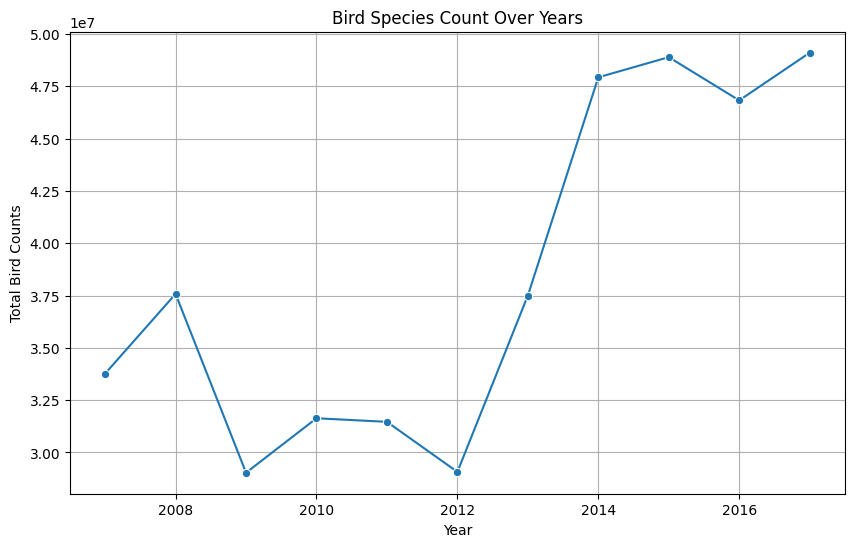

In [66]:
# Aggregate bird counts by year
yearly_counts = df1.groupby('Year')['bird_counts'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_counts, x='Year', y='bird_counts', marker='o')
plt.title('Bird Species Count Over Years')
plt.xlabel('Year')
plt.ylabel('Total Bird Counts')
plt.grid(True)
plt.show()


what to do: We measured how often birds that are at risk (according to Partners in Flight or PIF) were spotted in different parks and regions.
How TO dO it: We counted sightings of these birds within two distance ranges: close by (within 50 meters) and a bit farther away (50-100 meters).

So basically, we looked at how often these at-risk birds were seen in parks and regions to help understand their conservation needs.


In [67]:
# Filter for at-risk birds
df_at_risk = df1[df1['PIF_Watchlist_Status'] == True]

In [68]:
pivot_df2 = df_at_risk.pivot_table(index='Admin_Unit_Code', columns='Common_Name', values='bird_counts', fill_value=0)

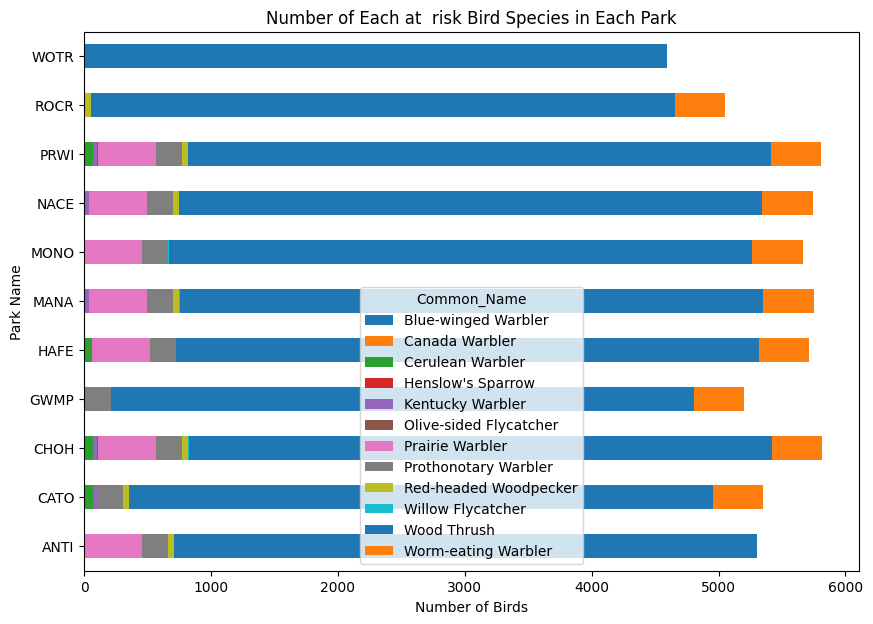

In [69]:
pivot_df2.plot(kind='barh', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('Number of Birds')
plt.ylabel('Park Name')
plt.title('Number of Each at  risk Bird Species in Each Park')

# Show the plot
plt.show()

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120361 entries, 26862 to 76301
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Admin_Unit_Code              120361 non-null  object 
 1   Site_Name                    98132 non-null   object 
 2   Location_Type                120361 non-null  object 
 3   Year                         120361 non-null  int64  
 4   day                          120361 non-null  int32  
 5   month                        120361 non-null  int32  
 6   Start_Time                   120361 non-null  object 
 7   End_Time                     120361 non-null  object 
 8   Visit                        120361 non-null  int64  
 9   Interval_Length              120361 non-null  object 
 10  ID_Method                    120361 non-null  object 
 11  Distance                     120361 non-null  object 
 12  Flyover_Observed             120361 non-null  bool   
 13  S

In [71]:
# Group by park/region and distance range, then count sightings
grouped_df = df_at_risk.groupby(['Admin_Unit_Code', 'Distance']).size().reset_index(name='count')
grouped_df

,Admin_Unit_Code,Distance,count
0,ANTI,50 - 100 Meters,123
1,ANTI,<= 50 Meters,61
2,CATO,50 - 100 Meters,593
3,CATO,<= 50 Meters,369
4,CHOH,50 - 100 Meters,524
5,CHOH,<= 50 Meters,482
6,GWMP,50 - 100 Meters,98
7,GWMP,<= 50 Meters,78
8,HAFE,50 - 100 Meters,189
9,HAFE,<= 50 Meters,160


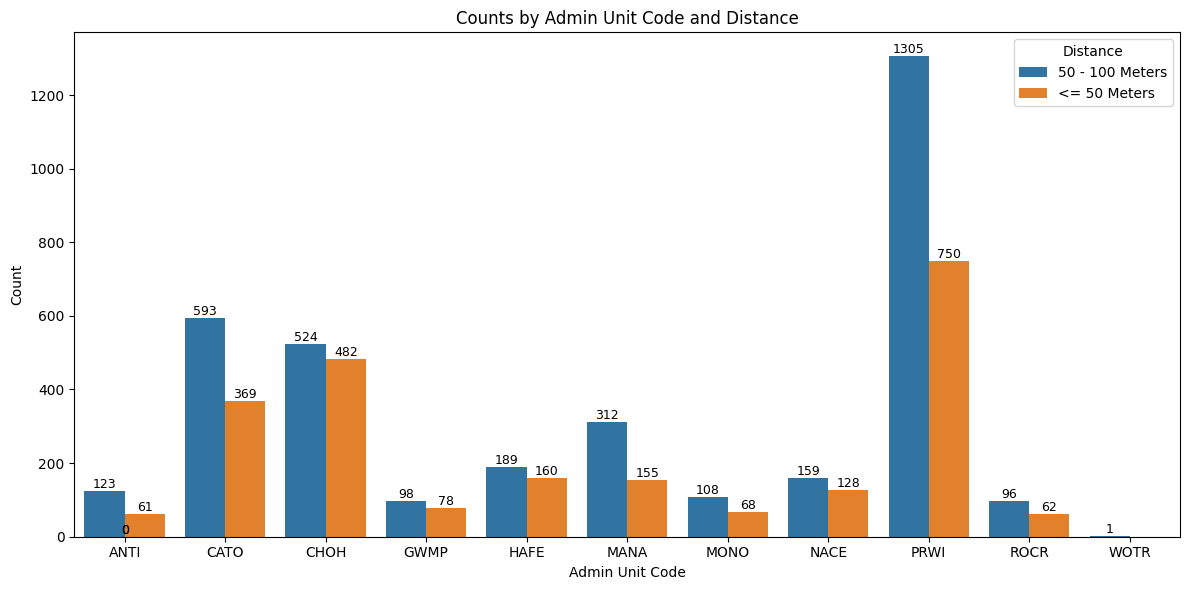

In [72]:
# Assuming grouped_df is already calculated
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Admin_Unit_Code', y='count', hue='Distance', data=grouped_df)
plt.xlabel('Admin Unit Code')
plt.ylabel('Count')
plt.title('Counts by Admin Unit Code and Distance')
plt.legend(title='Distance')

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', 
            ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [73]:
# Pivot the table to get distance ranges as columns and parks/regions as rows
pivot_df = grouped_df.pivot_table(index='Admin_Unit_Code', columns='Distance', values='count', fill_value=0)
pivot_df

Distance,50 - 100 Meters,<= 50 Meters
Admin_Unit_Code,,
ANTI,123.0,61.0
CATO,593.0,369.0
CHOH,524.0,482.0
GWMP,98.0,78.0
HAFE,189.0,160.0
MANA,312.0,155.0
MONO,108.0,68.0
NACE,159.0,128.0
PRWI,1305.0,750.0


This pivot table shows the count of at-risk bird sightings within the two distance ranges for each park/region.

In [74]:
df1.head(1)

,Admin_Unit_Code,Site_Name,Location_Type,Year,day,month,Start_Time,End_Time,Visit,Interval_Length,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification
26862,CHOH,CHOH 1,Forest,2007,2,7,05:49:00,05:59:00,2,2.5 - 5 min,...,False,False,10.5,76.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,1258,Common


To find out how many birds are in one hectare (birds per ha) for each species, we first calculate the average number of birds at each monitoring spot.
We then divide this average by 3.14 hectares (because a monitoring spot is a circle with a 100-meter radius, and its area is 3.14 hectares).
This gives us the population density, which is the number of birds per hectare.


In [75]:
avg_bird_count = df1.groupby(['Common_Name', 'Admin_Unit_Code']).bird_counts.mean().reset_index()

In [76]:

# Calculate the overall average per species
average_birds_per_species = avg_bird_count.groupby('Common_Name')['bird_counts'].mean().reset_index()


In [77]:
average_birds_per_species

,Common_Name,bird_counts
0,Acadian Flycatcher,4886.0
1,Alder Flycatcher,1.0
2,American Bittern,1.0
3,American Crow,3271.0
4,American Goldfinch,3719.0
...,...,...
177,Yellow-breasted Chat,130.0
178,Yellow-rumped Warbler,24.0
179,Yellow-throated Vireo,600.0
180,Yellow-throated Warbler,113.0


Converting to Population Density

In [78]:
area_hectares = 3.14

average_birds_per_species['population_density'] = average_birds_per_species['bird_counts'] / area_hectares

# Sorting population_density in descending order
average_birds_per_species_sorted = average_birds_per_species.sort_values(by='population_density', ascending=False)
average_birds_per_species_sorted

,Common_Name,bird_counts,population_density
121,Red-eyed Vireo,8121.0,2586.305732
99,Northern Cardinal,6385.0,2033.439490
62,Eastern Tufted Titmouse,6322.0,2013.375796
63,Eastern Wood-Pewee,5412.0,1723.566879
39,Carolina Wren,5115.0,1628.980892
...,...,...,...
120,Red-breasted Nuthatch,1.0,0.318471
131,Ruby-crowned Kinglet,1.0,0.318471
137,Snowy Egret,1.0,0.318471
138,Solitary Vireo,1.0,0.318471


In [79]:
!pip install geopy


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
from geopy.geocoders import Nominatim

In [81]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="park_locator")


In [82]:
df1.groupby('Admin_Unit_Code')['Admin_Unit_Code'].count()

Admin_Unit_Code
ANTI    12431
CATO     9736
CHOH    26407
GWMP     4690
HAFE     5523
MANA    12506
MONO     8112
NACE     7617
PRWI    29096
ROCR     3586
WOTR      657
Name: Admin_Unit_Code, dtype: int64

In [83]:
parks_data = {
    "Admin_Unit_Code": ["ANTI", "CATO", "CHOH", "GWMP", "HAFE", "MANA", "MONO", "NACE", "PRWI", "ROCR", "WOTR"],
    #"state_province": ["Maryland", "Maryland", "Washington", "Maryland", "Virginia", "Maryland", "Virginia", "Maryland", "Virginia", "Maryland", "Virginia"],
    "country": ["USA"] * 11
}

# Create a DataFrame for the parks
parks_df = pd.DataFrame(parks_data)

In [84]:
parks_df

,Admin_Unit_Code,country
0,ANTI,USA
1,CATO,USA
2,CHOH,USA
3,GWMP,USA
4,HAFE,USA
5,MANA,USA
6,MONO,USA
7,NACE,USA
8,PRWI,USA
9,ROCR,USA


In [85]:
#for latitude and longitude
def get_coordinates(row):
    query = f"{row['Admin_Unit_Code']},{row['country']}"
    location = geolocator.geocode(query)
    if location:
        return pd.Series([location.latitude, location.longitude])
    else:
        return pd.Series([None, None])

# Apply function to DataFrame
parks_df[['latitude', 'longitude']] = parks_df.apply(get_coordinates, axis=1)

parks_df


,Admin_Unit_Code,country,latitude,longitude
0,ANTI,USA,38.898930,-77.036537
1,CATO,USA,43.125619,-76.533160
2,CHOH,USA,NaN,NaN
3,GWMP,USA,38.963436,-77.178545
4,HAFE,USA,NaN,NaN
5,MANA,USA,22.036663,-159.770709
6,MONO,USA,37.953393,-118.939876
7,NACE,USA,37.439578,-79.823931
8,PRWI,USA,NaN,NaN
9,ROCR,USA,NaN,NaN


choh- 39.60016566536781, -77.82453299017027
hafe - 39.31791217535727, -77.75741194286461
prwi - 38.58551264238383, -77.38350661591359
rocr- 38.912849974554085, -77.07953281783465

In [86]:
manual_coords = {
    "CHOH": (39.60016566536781, -77.82453299017027),
    "HAFE": (39.31791217535727, -77.75741194286461),
    "PRWI": (38.58551264238383, -77.38350661591359),
    "ROCR": (38.912849974554085, -77.07953281783465),
}

for park, coords in manual_coords.items():
    parks_df.loc[parks_df['Admin_Unit_Code'] == park, ['latitude', 'longitude']] = coords

In [87]:
parks_df

,Admin_Unit_Code,country,latitude,longitude
0,ANTI,USA,38.898930,-77.036537
1,CATO,USA,43.125619,-76.533160
2,CHOH,USA,39.600166,-77.824533
3,GWMP,USA,38.963436,-77.178545
4,HAFE,USA,39.317912,-77.757412
5,MANA,USA,22.036663,-159.770709
6,MONO,USA,37.953393,-118.939876
7,NACE,USA,37.439578,-79.823931
8,PRWI,USA,38.585513,-77.383507
9,ROCR,USA,38.912850,-77.079533


In [88]:
pip install geopandas --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import geopandas as gpd
from shapely.geometry import Point

In [90]:
geometry = [Point(xy) for xy in zip(parks_df["longitude"], parks_df["latitude"])]
geo_df = gpd.GeoDataFrame(parks_df, geometry=geometry)

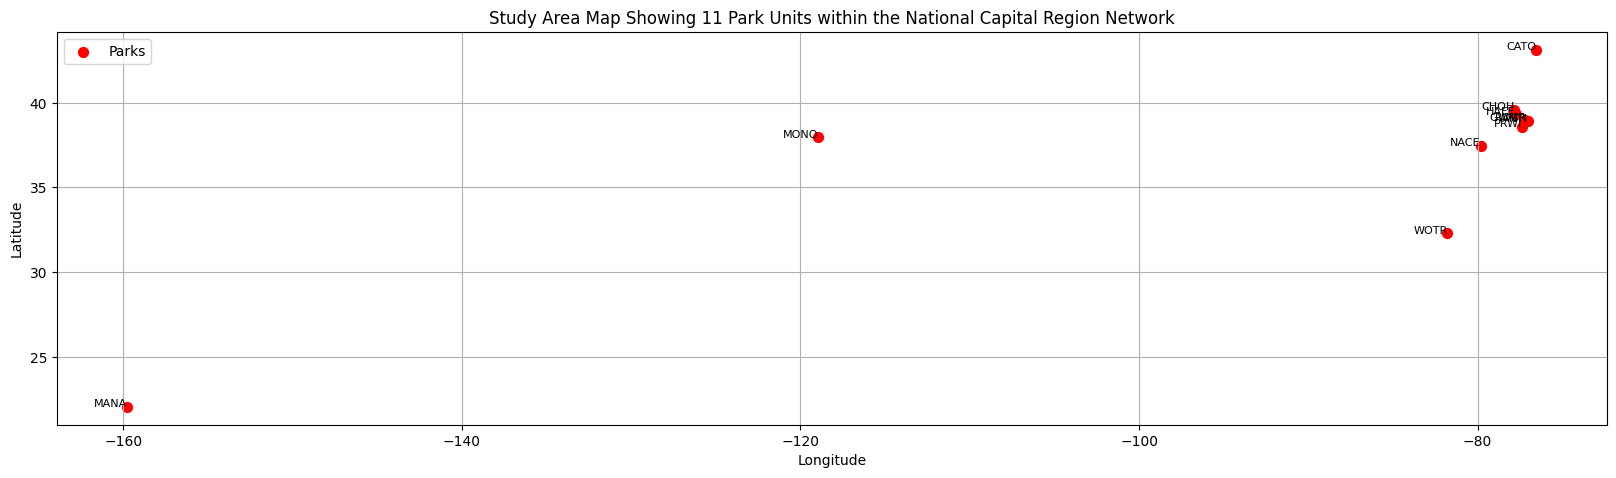

In [91]:
# Plotting the parks
fig, ax = plt.subplots(figsize=(20, 28))
geo_df.plot(ax=ax, marker='o', color='red', markersize=50, label='Parks')

for x, y, label in zip(parks_df["longitude"], parks_df["latitude"], parks_df["Admin_Unit_Code"]):
    ax.text(x, y, label, fontsize=8, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Study Area Map Showing 11 Park Units within the National Capital Region Network')
plt.legend()
plt.grid()

plt.show()

In [92]:
#more species richness is in parks other than MANA and MONO,

In [93]:
# Merging the DataFrames on 'Admin_Unit_Code'
merged_df = pd.merge(df1, parks_df, on='Admin_Unit_Code')


In [94]:
merged_df.head(1)

,Admin_Unit_Code,Site_Name,Location_Type,Year,day,month,Start_Time,End_Time,Visit,Interval_Length,...,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification,country,latitude,longitude
0,CHOH,CHOH 1,Forest,2007,2,7,05:49:00,05:59:00,2,2.5 - 5 min,...,76.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,1258,Common,USA,39.600166,-77.824533


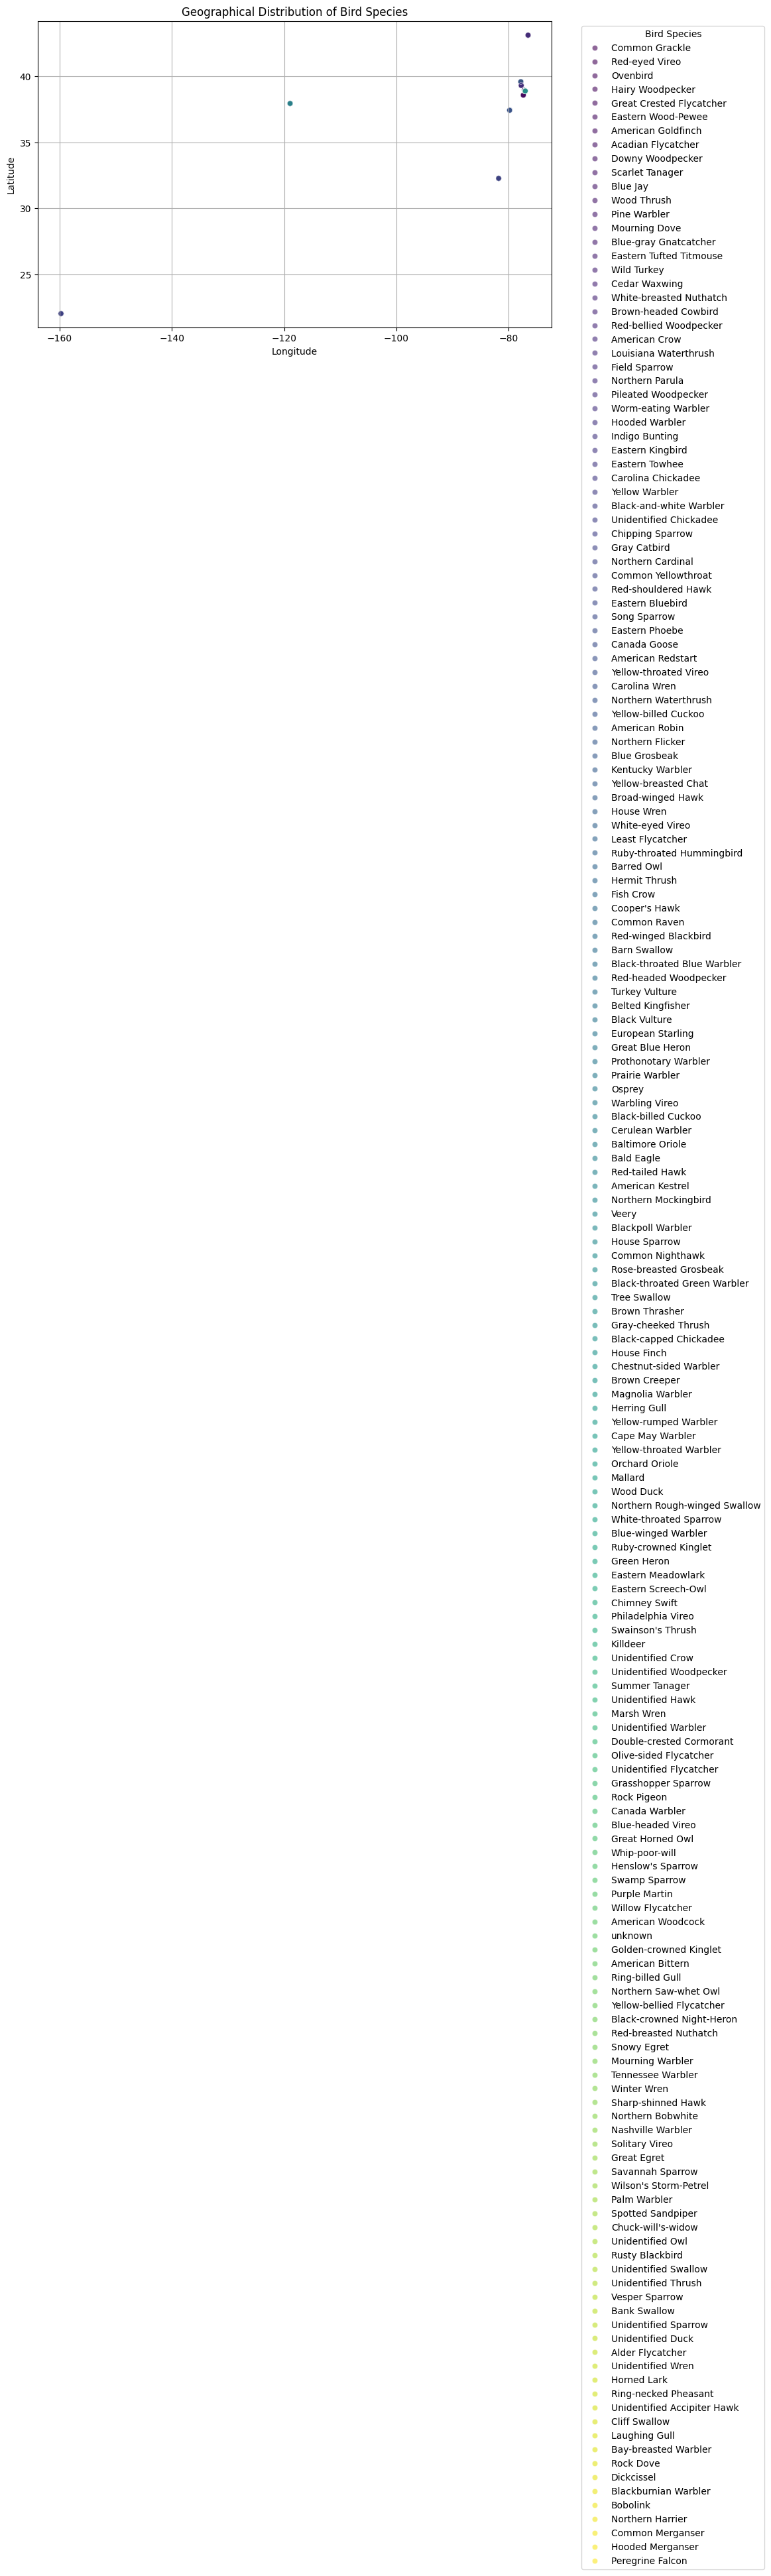

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for geographical distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='longitude', y='latitude', hue='Common_Name', palette='viridis', alpha=0.6)
plt.title('Geographical Distribution of Bird Species')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [96]:
pip install mpl_toolkits.basemap

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


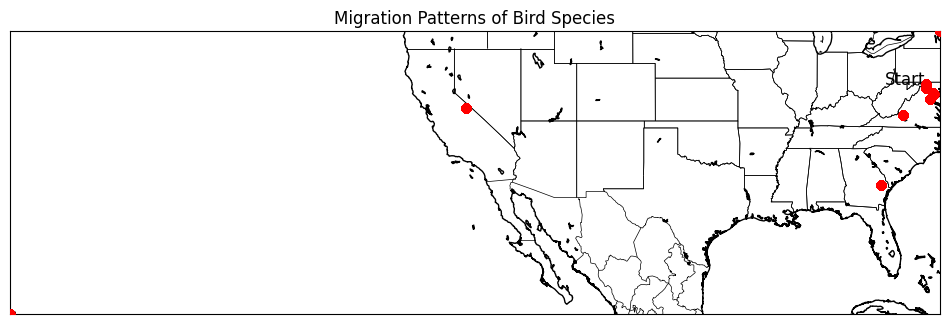

In [97]:
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Plotting migration patterns on a Basemap
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=merged_df['latitude'].min(), urcrnrlat=merged_df['latitude'].max(),
            llcrnrlon=merged_df['longitude'].min(), urcrnrlon=merged_df['longitude'].max(), resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Scatter plot of bird sightings
x, y = m(merged_df['longitude'].values, merged_df['latitude'].values)
m.scatter(x, y, marker='o', color='r', alpha=0.5, zorder=5)

# Add labels or arrows to indicate migration routes
# Example of adding a label at the first point
plt.text(x[0], y[0], 'Start', fontsize=12, ha='right')

plt.title('Migration Patterns of Bird Species')
plt.show()


**Heatmap of Bird Sightings by Location and Time**

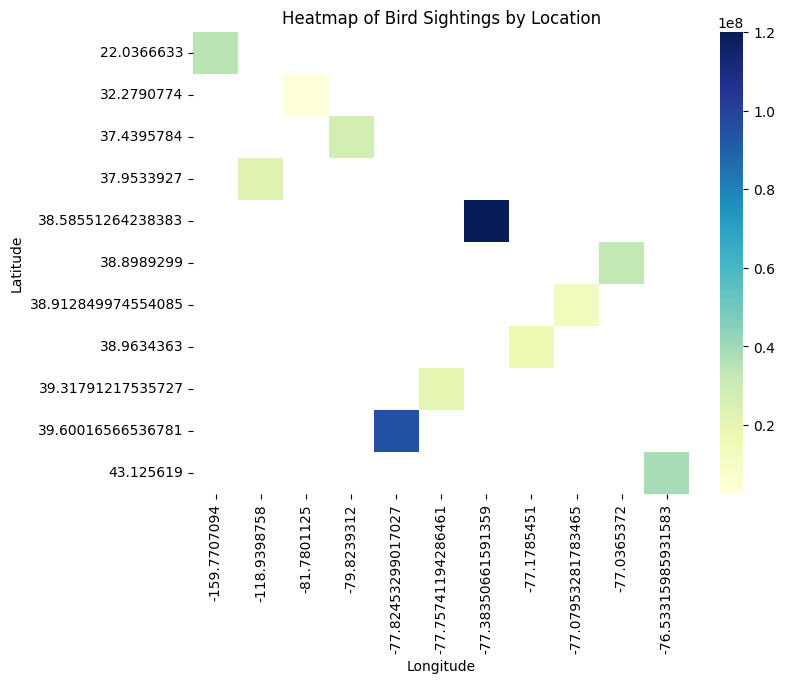

In [98]:
# Pivot table for heatmap
heatmap_data = merged_df.pivot_table(index='latitude', columns='longitude', values='bird_counts', aggfunc='sum')

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Bird Sightings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Correlation Matrix of Environmental Factors
Analyze the correlation between different environmental factors and bird counts.

In [99]:
merged_df.head()

,Admin_Unit_Code,Site_Name,Location_Type,Year,day,month,Start_Time,End_Time,Visit,Interval_Length,...,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,bird_counts,bird_classification,country,latitude,longitude
0,CHOH,CHOH 1,Forest,2007,2,7,05:49:00,05:59:00,2,2.5 - 5 min,...,76.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False,1258,Common,USA,39.600166,-77.824533
1,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,5 - 7.5 min,...,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,8121,Very Common,USA,38.585513,-77.383507
2,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,3072,Common,USA,38.585513,-77.383507
3,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,646,Common,USA,38.585513,-77.383507
4,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,84.0,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,1878,Common,USA,38.585513,-77.383507


In [100]:
# Assuming your DataFrame is named df and the column of interest is 'column_name'
unique_values = merged_df['Wind'].unique()
print(unique_values)


['Calm (< 1 mph) smoke rises vertically'
 'Light air movement (1-3 mph) smoke drifts'
 'Light breeze (4-7 mph) wind felt on face'
 'Gentle breeze (8-12 mph), leaves in motion'
 'Fresh breeze (19-24 mph), small trees sway'
 'Moderate breeze (13-18 mph), moves small branches']


In [101]:
# Perform one-hot encoding on 'Wind' column
merged_df = pd.get_dummies(merged_df, columns=['Wind'],dtype=int)


In [102]:
merged_df.head()

,Admin_Unit_Code,Site_Name,Location_Type,Year,day,month,Start_Time,End_Time,Visit,Interval_Length,...,bird_classification,country,latitude,longitude,Wind_Calm (< 1 mph) smoke rises vertically,"Wind_Fresh breeze (19-24 mph), small trees sway","Wind_Gentle breeze (8-12 mph), leaves in motion",Wind_Light air movement (1-3 mph) smoke drifts,Wind_Light breeze (4-7 mph) wind felt on face,"Wind_Moderate breeze (13-18 mph), moves small branches"
0,CHOH,CHOH 1,Forest,2007,2,7,05:49:00,05:59:00,2,2.5 - 5 min,...,Common,USA,39.600166,-77.824533,1,0,0,0,0,0
1,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,5 - 7.5 min,...,Very Common,USA,38.585513,-77.383507,0,0,0,1,0,0
2,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,Common,USA,38.585513,-77.383507,0,0,0,1,0,0
3,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,Common,USA,38.585513,-77.383507,0,0,0,1,0,0
4,PRWI,PRWI 22,Forest,2007,7,6,06:45:00,07:03:00,1,0-2.5 min,...,Common,USA,38.585513,-77.383507,0,0,0,1,0,0


In [103]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120361 entries, 0 to 120360
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Admin_Unit_Code                                         120361 non-null  object 
 1   Site_Name                                               98132 non-null   object 
 2   Location_Type                                           120361 non-null  object 
 3   Year                                                    120361 non-null  int64  
 4   day                                                     120361 non-null  int32  
 5   month                                                   120361 non-null  int32  
 6   Start_Time                                              120361 non-null  object 
 7   End_Time                                                120361 non-null  object 
 8   Visit                   

Correlation Matrix of Environmental Factors and Bird Counts

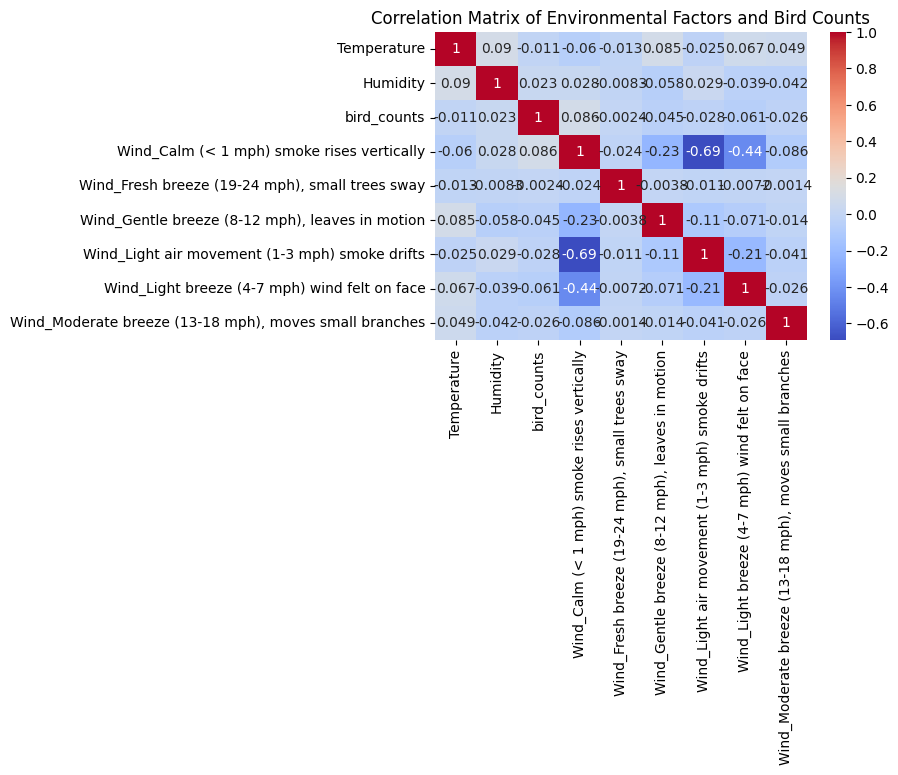

In [104]:
# Calculate correlation matrix
corr_matrix = merged_df[['Temperature', 'Humidity', 'bird_counts','Wind_Calm (< 1 mph) smoke rises vertically','Wind_Fresh breeze (19-24 mph), small trees sway','Wind_Gentle breeze (8-12 mph), leaves in motion','Wind_Light air movement (1-3 mph) smoke drifts','Wind_Light breeze (4-7 mph) wind felt on face','Wind_Moderate breeze (13-18 mph), moves small branches']].corr()

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Environmental Factors and Bird Counts')
plt.show()
